## Import Statements

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\jslon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Phase Data

Here I am using a manual phase shifter to vary the relative phase of the two inputs to the hybrid coupler, recording the output reading in a power meter

In [2]:
#Testing setup with blue phase shifter and hybrid 1 -> 2 slot 1-1 input slots 1-4 > 2-1 shifted slots 2-4 output
#testing on 6.8GHz at 0dBm on source a and power meter
#At 10dBm maxed out

end = 1000

#Micrometer reading
Micro1 = np.arange(0,end+5,5)

#Power Meter reading blue phase
Power1 = np.array([-11.40,-11.34,-10.96,-10.61,-10.28,
                   -9.96,-9.70,-9.41,-9.13,-8.86,
                   -8.59,-8.33,-8.06,-7.84,-7.63,
                   -7.44,-7.24,-7.03,-6.82,-6.63,
                   -6.45,-6.30,-6.10,-5.85,-5.71,
                   -5.59,-5.47,-5.33,-5.21,-5.09,
                   -4.97,-4.89,-4.79,-4.67,-4.60,
                   -4.49,-4.41,-4.33,-4.26,-4.18,
                   -4.11,-4.04,-3.98,-3.92,-3.86,
                   -3.82,-3.77,-3.71,-3.67,-3.63,
                   -3.59,-3.57,-3.52,-3.48,-3.45,
                   -3.41,-3.40,-3.39,-3.36,-3.33,
                   -3.31,-3.31,-3.28,-3.32,-3.33,
                   -3.34,-3.30,-3.30,-3.28,-3.29,
                   -3.31,-3.32,-3.36,-3.35,-3.39,
                   -3.40,-3.45,-3.47,-3.50,-3.54,
                   -3.59,-3.65,-3.70,-3.74,-3.79,
                   -3.85,-3.90,-3.96,-4.03,-4.12,
                   -4.20,-4.25,-4.33,-4.43,-4.51,
                   -4.61,-4.70,-4.80,-4.92,-5.02,
                   -5.13,-5.27,-5.39,-5.50,-5.63,
                   -5.76,-5.89,-6.01,-6.25,-6.41,
                   -6.59,-6.76,-6.97,-7.17,-7.49,
                   -7.71,-7.90,-8.14,-8.42,-8.66,
                   -8.91,-9.17,-9.42,-9.73,-9.97,
                   -10.24,-10.59,-10.90,-11.31,-11.68,
                   -12.02,-12.42,-12.86,-13.35,-13.84,
                   -14.23,-14.72,-15.32,-15.93,-16.61,
                   -17.20,-17.95,-18.86,-19.82,-20.67,
                   -21.84,-23.14,-24.70,-26.79,-28.52,
                   np.nan,np.nan,np.nan,np.nan,np.nan,
                   -27.60,-25.55,-23.81,-22.38,-21.10,
                   -20.01,-19.05,-18.10,-17.35,-16.59,
                   -15.92,-15.35,-14.71,-14.17,-13.67,
                   -13.17,-12.74,-12.26,-11.83,-11.45,
                   -11.11,-10.77,-10.44,-10.05,-9.79,
                   -9.55,-9.28,-9.00,-8.70,-8.43,
                   -8.19,-7.95,-7.72,-7.52,-7.37,
                   -7.15,-6.95,-6.76,-6.57,-6.38,
                   -6.22,-6.04,-5.80,-5.67,-5.56,
                   -5.41])

#err1 around pm 0.01 at high and 0.025 at low

I then run the source directly into the power meter to more accurately quantify the relationship between the source power and the power meter reading

In [3]:
#Source A running into power meter

#Source displayed power
Source1 = np.arange(-50,0.5,0.5)

#Power Meter reading
Power2 = np.array([-25.14,-25.13,-25.13,-25.14,-25.16,
                   -25.16,-25.15,-25.07,-24.75,-24.39,
                   -24.00,-23.60,-23.32,-23.08,-22.84,
                   -22.59,-22.31,-22.05,-21.75,-21.51,
                   -21.22,-20.95,-20.67,-20.38,-20.11,
                   -19.83,-19.53,-19.22,-18.91,-18.64,
                   -18.37,-18.05,-17.76,-17.46,-17.12,
                   -16.85,-16.57,-16.27,-15.95,-15.67,
                   -15.36,-15.03,-14.77,-14.50,-14.22,
                   -13.94,-13.67,-13.39,-13.09,-12.82,
                   -12.53,-12.27,-12.00,-11.72,-11.49,
                   -11.20,-10.94,-10.67,-10.39,-10.12,
                   -9.89,-9.63,-9.40,-9.18,-8.93,
                   -8.68,-8.45,-8.20,-7.95,-7.77,
                   -7.54,-7.33,-7.13,-6.93,-6.71,
                   -6.50,-6.28,-6.05,-5.77,-5.59,
                   -5.40,-5.25,-5.06,-4.89,-4.72,
                   -4.54,-4.37,-4.15,-3.98,-3.79,
                   -3.58,-3.36,-3.13,-2.90,-2.68,
                   -2.49,-2.26,-2.04,-1.86,-1.67,
                   -1.43])

This is the conversion from dBm to mW

In [4]:
mW = lambda dBm: 10**((dBm+1.15)/10)

This plot shows the first set of data, the phase data from the power meter

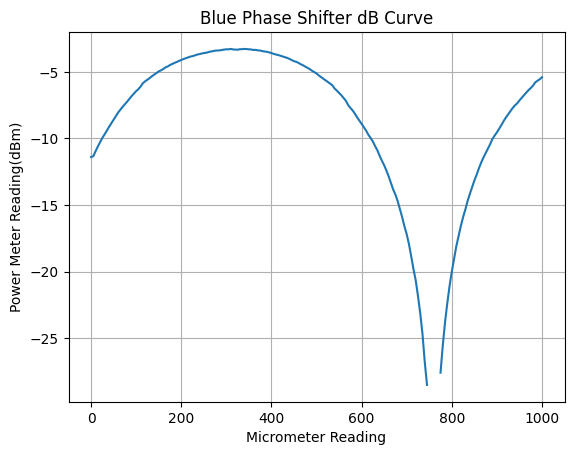

In [5]:
plt.plot(Micro1,Power1)
plt.xlabel('Micrometer Reading')
plt.ylabel('Power Meter Reading(dBm)')
plt.title('Blue Phase Shifter dB Curve')
plt.grid()

This was fit with vernier graphical analysis on the mW curve and plot again the raw data

In [6]:
Approx1 = lambda x: 0.3102*np.sin(0.007237*x + 5.52) + 0.3066

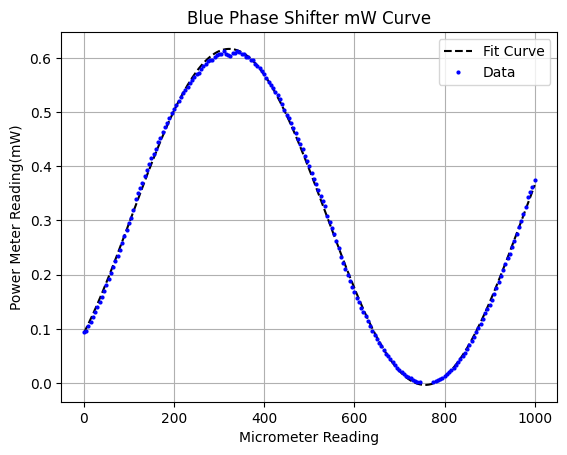

In [7]:
Power1mW = mW(Power1)
plt.plot(Micro1,Approx1(Micro1),'--k',label='Fit Curve')
plt.plot(Micro1,Power1mW,'ob',markersize=2,label='Data')
plt.xlabel('Micrometer Reading')
plt.ylabel('Power Meter Reading(mW)')
plt.title('Blue Phase Shifter mW Curve')
plt.legend()
plt.grid()

The percent error from the sine wave fit is plotted, it is important to note that as the value near zero the percent error diverges, there is likely a source of constant amplitude error present.

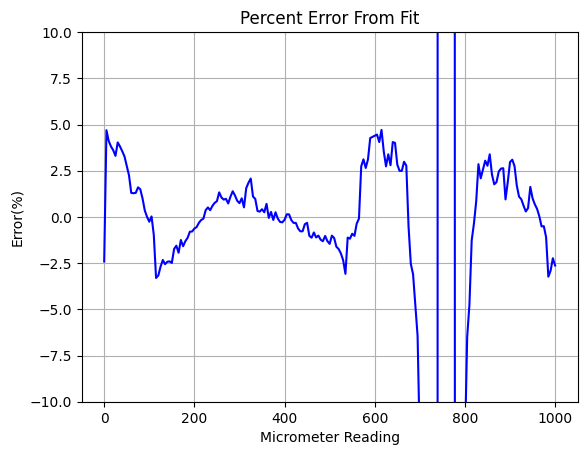

In [8]:
plt.plot(Micro1,100*(Approx1(Micro1)-Power1mW)/Approx1(Micro1),'-b')
plt.ylabel('Error(%)')
plt.xlabel('Micrometer Reading')
plt.title('Percent Error From Fit')
plt.ylim(-10,10)
plt.grid()

This is the absolute error from the fit (in mW), we expect to see higher error when the value is larger and when the derivative is larger as we are ideally measuring mostly phase noise

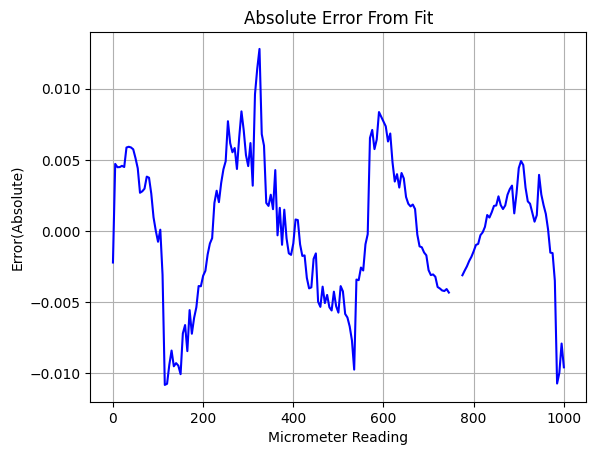

In [9]:
plt.plot(Micro1,(Approx1(Micro1)-Power1mW),'-b')
plt.ylabel('Error(Absolute)')
plt.xlabel('Micrometer Reading')
plt.title('Absolute Error From Fit')
plt.grid()

Here I fit different types of fits to the power meter data from the start

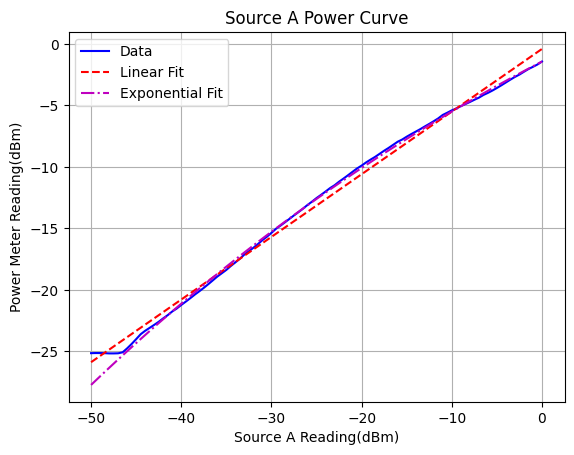

In [10]:
linefit = lambda x: 0.5094*x - 0.4042
expfit = lambda x: -31.56*np.exp(-0.01212*x) + 30.13

plt.plot(Source1,Power2,'-b',label='Data')
plt.plot(Source1,linefit(Source1),'--r',label='Linear Fit')
plt.plot(Source1,expfit(Source1),'-.m',label='Exponential Fit')
plt.xlabel('Source A Reading(dBm)')
plt.ylabel('Power Meter Reading(dBm)')
plt.title('Source A Power Curve')
plt.legend()
plt.grid()

## Examining Phase Variance

In this experiment, a DMM is used to collect a few thousand samples for the output detector voltage at a given relative phase input to the QH, allowing us to measure the short-term variance

In [11]:
#Source A 6.8GHz, 0dBm, blue phase, 55 meter, qh 1-2 phase -> 2-3, 2-4 being read, hovering around 0.009mV
#Steady 13:30-13:33
#Bending 13:33-13:34#kinks high high angle
#min 0.01mV
#pm 0.0005mV avg
#pm 0.001mV min/max var
#max 20mV
#same variance 0.003-0.004mV when off
print(f'{round(100*0.0005/20,5)}%')

0.0025%


In [12]:
#Source A det 646 to bench multimeter, 5Ohm parallel

In [13]:
#Source A 6.8GHz, 0dBm, blue phase, 55 meter, qh 1-2 phase -> 2-3, 2-4 being read

#When no power sits around 3.2uV pm 0.35uV
#minimum at 150 meter 11uV pm 0.2uV
#max at 625 meter 19.1mV pm 30uV
#meter 500 16.2mV pm 15uV
#meter 400 10.7mV pm 15uV
#meter 250 2.06mV pm 4uV

print(f'{round(100*0.35/3.2,4)}%')
print(f'{round(100*4/2060,4)}%')
print(f'{round(100*15/13000,4)}%')
print(f'{round(100*30/19100,4)}%')

10.9375%
0.1942%
0.1154%
0.1571%


Amplifying detector voltage by 100x at 0dBm power, run into the QH with the phase shifter (basic interference setup), voltage measured on DMM

In [14]:
#Using the multimeter and amplifier circuit with gain of 100, same basic interference circuit, lights off.

In [15]:
def GetReading(filename: str):
  df = pd.read_csv(filename, skiprows=list(range(0,8)))
  vals = df['Reading'].values
  return vals

def std1(vals):
  std = np.std(vals)/np.mean(vals)
  return std

In [16]:
vals0 = GetReading('Meterval0000v1.csv')
vals1 = GetReading('Meterval0100v1.csv')
vals2 = GetReading('Meterval0200v1.csv')
vals3 = GetReading('Meterval0300v1.csv')
vals4 = GetReading('Meterval0400v1.csv')
vals5 = GetReading('Meterval0500v1.csv')
vals6 = GetReading('Meterval0600v1.csv')
vals7 = GetReading('Meterval0700v1.csv')
vals8 = GetReading('Meterval0800v1.csv')
vals9 = GetReading('Meterval0900v1.csv')

In [17]:
Approx1 = lambda x: 0.3102*np.sin(0.007237*x + 5.52) + 0.3066

This plot shows the percent standard deviation for the DMM readings at varying phase shifter values

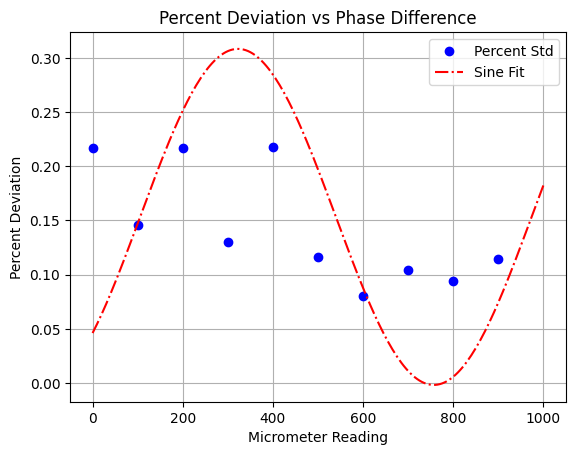

In [18]:
Metervals = np.arange(0,1000,100)
Valsarray = [vals0,vals1,vals2,vals3,vals4,vals5,vals6,vals7,vals8,vals9]
Stdvals = np.array([std1(i) for i in Valsarray])
meanvals = np.array([np.mean(i) for i in Valsarray])
plt.plot(Metervals,100*np.abs(Stdvals),'ob',label="Percent Std")
plt.plot(Micro1,Approx1(Micro1)/2,'-.r',label='Sine Fit')
plt.xlabel('Micrometer Reading')
plt.ylabel('Percent Deviation')
plt.title('Percent Deviation vs Phase Difference')
plt.legend()
plt.grid()

This is the same as above, except it plots the mean values instead of the deviation

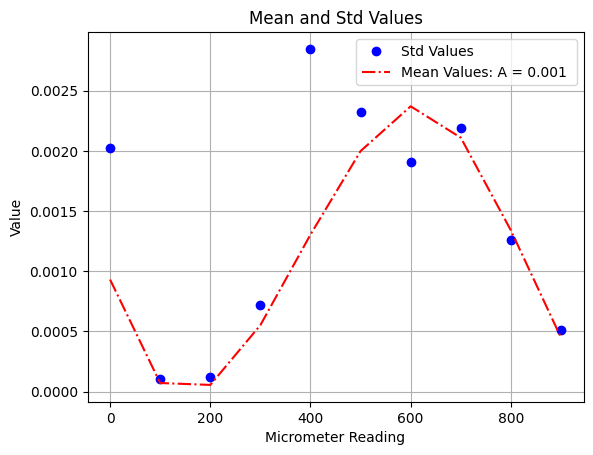

In [19]:
Metervals = np.arange(0,1000,100)
a=1000
Stdvals = np.array([np.std(i) for i in Valsarray])
meanvals = np.array([-np.mean(i)/a for i in Valsarray])
plt.plot(Metervals,Stdvals,'ob',label="Std Values")
plt.plot(Metervals,meanvals,'-.r',label=f'Mean Values: A = {round(1/a,4)} ')
plt.xlabel('Micrometer Reading')
plt.ylabel('Value')
plt.title('Mean and Std Values')
plt.legend()
plt.grid()

This was an experiment where the source was plugged directly into the detector, which was then plugged into the DMM to measure many data points without changing anything, attempting to measure a pedestal error.

In [20]:
valsb = GetReading('BasicCircuitv1.csv')
meanb = np.abs(np.mean(valsb))
stdb = np.abs(np.std(valsb))
stdpb = 100*stdb/meanb

print(f"Mean = {round(meanb,5)}")
print(f"Standard Deviation = {round(stdb,5)}")
print(f"Percent Standard Deviation = {round(stdpb,5)}%")

Mean = 2.8895
Standard Deviation = 0.00598
Percent Standard Deviation = 0.20693%


In [21]:
#Using basic setup circuit for detectors and with lights on and no amplification all basic and detector from now on using 50 ohm, most before did too

## Measuring detector variance in relation to input power

The DMM is used to sample numerous readings from the detector at varying input powers to determine the relationship between the error present in the detector's readings and its input power

In [22]:
def LoopPowerRead(detector: str, pwrrange = (-20,20), stepsize=2):
  valsarray = []
  powervals = np.arange(pwrrange[0],pwrrange[1]+stepsize,stepsize)
  for pwr in powervals:
    pwr = str(int(pwr))
    S1 = r"det"
    S2 = '_'
    S3 = 'dBm_v1.csv'
    filename = S1 + detector + S2 + pwr +S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

Here i am reading in DMM values from detector 646 for the power range of -20dBm to 20dBm and computing the mean, standard deviation, and percent standard deviation of the data array for each power value

In [23]:
valsarray646 = LoopPowerRead('646')
pwrvals = np.arange(-20,22,2)

meanvals646 = np.array([np.abs(np.mean(val)) for val in valsarray646])
stdvals646 = np.array([np.abs(np.std(val)) for val in valsarray646])
stdpvals646 = 100*stdvals646/meanvals646

This plot shows the relationship between the input power and the percent standard deviation

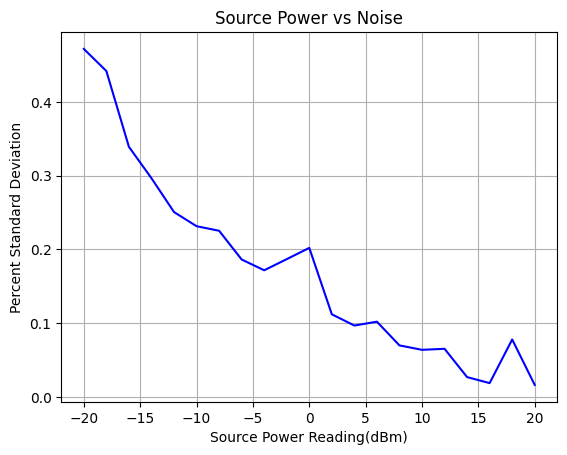

In [24]:
plt.plot(pwrvals,stdpvals646,'-b')
plt.xlabel('Source Power Reading(dBm)')
plt.ylabel('Percent Standard Deviation')
plt.title('Source Power vs Noise')
plt.grid()

As we can see, 20dBm source power reading shows the least percent standard deviation, thus we had the source output this power to check for noise when we sweep through varying relative phases for the QH inputs as was done before

In [25]:
#Same as old meter setup, but with 20dBm in attenuated by 10dB, no amplifying, det646
def LoopMeterRead(ver: str):
  valsarray = []
  metervals = ['0000','0100','0200','0300','0400','0500','0600','0700','0800','0900']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

def LoopMeterReadv2(ver: str):
  valsarray = []
  metervals = ['0000','0050','0100','0150','0200','0250','0300','0350','0400','0450','0500','0550','0600','0650','0700','0750','0800','0850','0900','0950','1000']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

def LoopMeterReadv3(ver: str):
  valsarray = []
  metervals = ['0000','0025','0050','0075','0100','0125','0150','0175','0200','0225','0250','0275','0300','0325','0350','0375','0400','0425','0450','0475','0500','0525','0550','0575','0600','0625','0650','0675','0700','0725','0750','0775','0800','0825','0850','0875','0900','0925','0950','0975','1000']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

In [26]:
metervalsarray = LoopMeterRead('v2')

metervals = np.arange(0,1000,100)
metervalsv2 = np.arange(0,1050,50)
metervalsv3 = np.arange(0,1025,25)
metermeanvals = np.array([np.abs(np.mean(vals)) for vals in metervalsarray])
meterstdvals = np.array([np.abs(np.std(val)) for val in metervalsarray])
meterstdpvals = 100*meterstdvals/metermeanvals

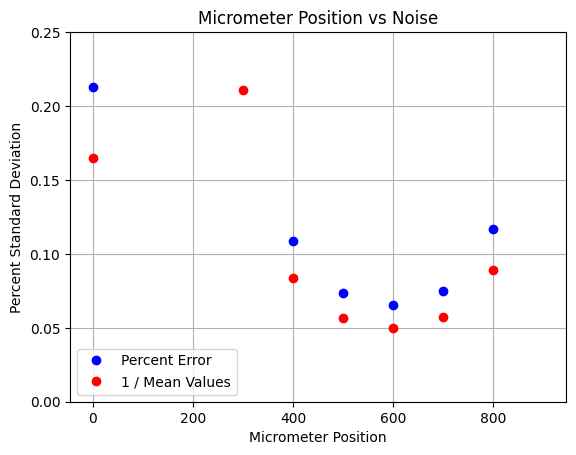

In [27]:
plt.plot(metervals,meterstdpvals,'ob',label='Percent Error')
plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
#plt.plot(Micro1,Approx1(Micro1)/2,'-.r',label='Sine Fit')
plt.plot(metervals,1/(1000*metermeanvals),'or',label='1 / Mean Values')
plt.legend()
plt.ylim(0,0.25)
plt.grid()

## Cable Setups

This setup is repeated with various cable configurations

In [28]:
#v3 longer cable, 2 daisy chained long cables
metervalsarray3 = LoopMeterRead('v3')

metermeanvals3 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray3])
meterstdvals3 = np.array([np.abs(np.std(val)) for val in metervalsarray3])
meterstdpvals3 = 100*meterstdvals3/metermeanvals3

#v4 short cable, straight non-phase stable
metervalsarray4 = LoopMeterRead('v4')

metermeanvals4 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray4])
meterstdvals4 = np.array([np.abs(np.std(val)) for val in metervalsarray4])
meterstdpvals4 = 100*meterstdvals4/metermeanvals4

#v5 long cable, non-phase stable
metervalsarray5 = LoopMeterRead('v5')

metermeanvals5 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray5])
meterstdvals5 = np.array([np.abs(np.std(val)) for val in metervalsarray5])
meterstdpvals5 = 100*meterstdvals5/metermeanvals5

Minimum for Phase Stable:     0.065%
Minimum for Non-Phase Stable: 0.066%


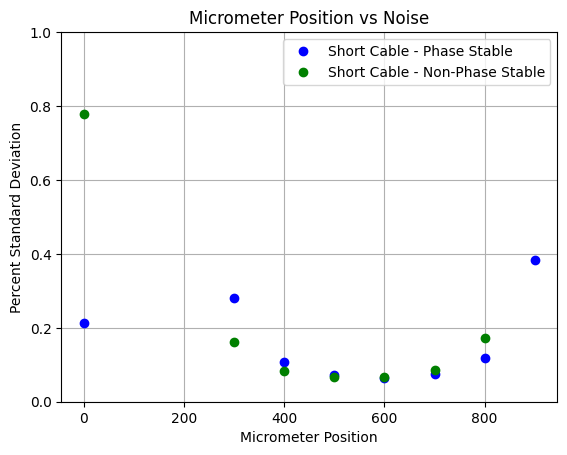

In [29]:
plt.plot(metervals,meterstdpvals,'ob',label='Short Cable - Phase Stable')
#plt.plot(metervals,meterstdpvals3,'or',label='Long Cable - Phase Stable')
plt.plot(metervals,meterstdpvals4,'og',label='Short Cable - Non-Phase Stable')
#plt.plot(metervals,meterstdpvals3,'or',label='Long Cable - Phase Stable')
plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.ylim(0,1)
plt.grid()
print(f'Minimum for Phase Stable:     {round(meterstdpvals.min(),3)}%')
print(f'Minimum for Non-Phase Stable: {round(meterstdpvals4.min(),3)}%')

The error present here does no widely vary between the two cables, suggesting that they either do not have a sizeable impact at this level of phase noise, or that amplitude noise is overpowering the phase noise

Minimum for Phase Stable:     0.179%
Minimum for Non-Phase Stable: 0.098%


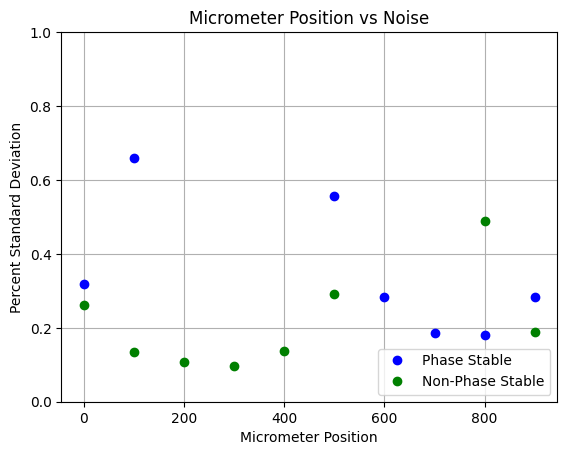

In [30]:
#plt.plot(metervals,meterstdpvals,'ob',label='Short Cable - Phase Stable')
plt.plot(metervals,meterstdpvals3,'ob',label='Phase Stable')
#plt.plot(metervals,meterstdpvals4,'og',label='Short Cable - Non-Phase Stable')
plt.plot(metervals,meterstdpvals5,'og',label='Non-Phase Stable')
plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.ylim(0,1)
plt.grid()
print(f'Minimum for Phase Stable:     {round(meterstdpvals3.min(),3)}%')
print(f'Minimum for Non-Phase Stable: {round(meterstdpvals5.min(),3)}%')

In the longer cables, the phase noise plays a larger role, and the non-phase stable cable seems to show less error somehow, the error is overall greater than with the short cables

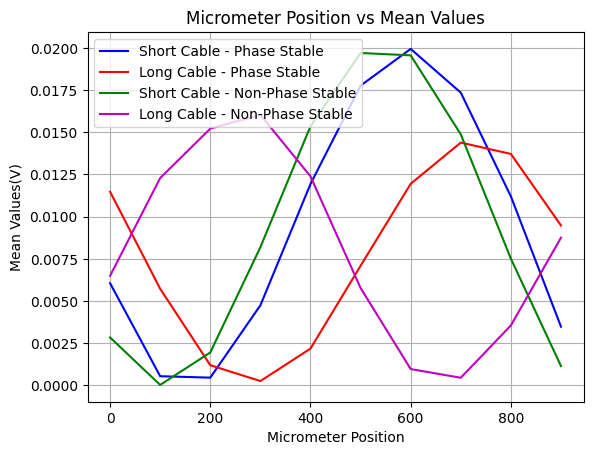

In [31]:
plt.plot(metervals,metermeanvals,'-b',label='Short Cable - Phase Stable')
plt.plot(metervals,metermeanvals3,'-r',label='Long Cable - Phase Stable')
plt.plot(metervals,metermeanvals4,'-g',label='Short Cable - Non-Phase Stable')
plt.plot(metervals,metermeanvals5,'-m',label='Long Cable - Non-Phase Stable')
plt.xlabel('Micrometer Position')
plt.ylabel('Mean Values(V)')
plt.title('Micrometer Position vs Mean Values')
plt.legend()
plt.grid()

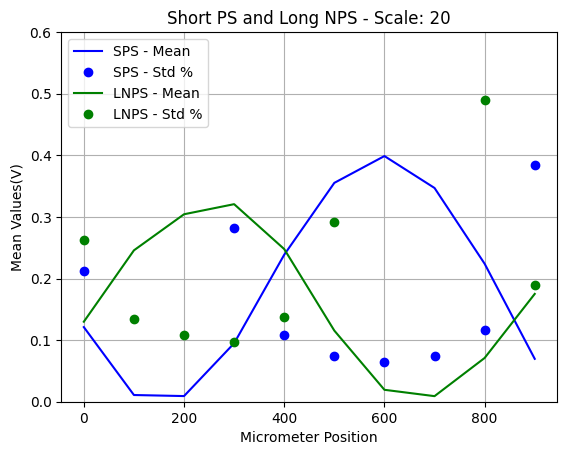

In [32]:
a = 20
plt.plot(metervals,a*metermeanvals,'-b',label='SPS - Mean')
plt.plot(metervals,meterstdpvals,'ob',label='SPS - Std %')
plt.plot(metervals,a*metermeanvals5,'-g',label='LNPS - Mean')
plt.plot(metervals,meterstdpvals5,'og',label='LNPS - Std %')
plt.xlabel('Micrometer Position')
plt.ylabel('Mean Values(V)')
plt.title(f'Short PS and Long NPS - Scale: {a}')
plt.legend()
plt.ylim(0,0.6)
plt.grid()

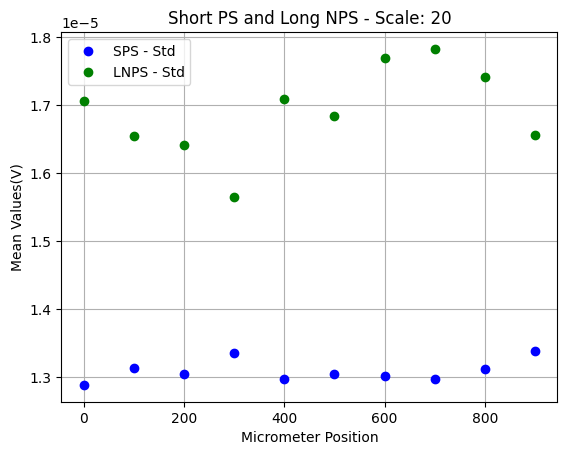

In [33]:
a = 20
#plt.plot(metervals,a*metermeanvals,'-b',label='SPS - Mean')
plt.plot(metervals,meterstdvals,'ob',label='SPS - Std')
#plt.plot(metervals,a*metermeanvals5,'-g',label='LNPS - Mean')
plt.plot(metervals,meterstdvals5,'og',label='LNPS - Std')
plt.xlabel('Micrometer Position')
plt.ylabel('Mean Values(V)')
plt.title(f'Short PS and Long NPS - Scale: {a}')
plt.legend()
plt.grid()

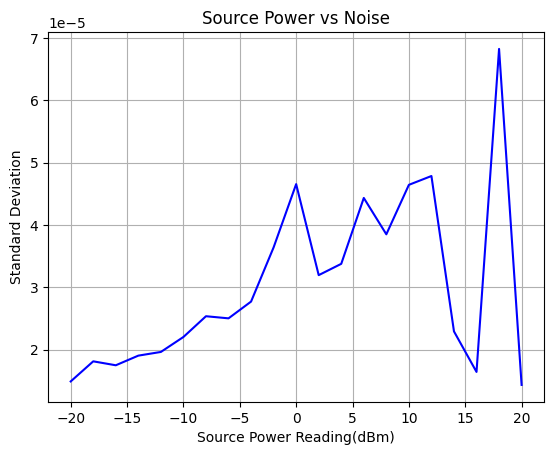

In [34]:
plt.plot(pwrvals,stdvals646,'-b')
plt.xlabel('Source Power Reading(dBm)')
plt.ylabel('Standard Deviation')
plt.title('Source Power vs Noise')
plt.grid()

In [35]:
#v6 short cable, phase stable, 740/s
metervalsarray6 = LoopMeterRead('v6')

metermeanvals6 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray6])
meterstdvals6 = np.array([np.abs(np.std(val)) for val in metervalsarray6])
meterstdpvals6 = 100*meterstdvals6/metermeanvals6

## Sample Rates

In this experiment, the rate at which the DMM takes samples is changed, and the effect on the error is measured

Minimum for 21k/s: 0.065%
Minimum for 740/s: 0.016%
21k/s Stable to 1 part per 1532.6
740/s Stable to 1 part per 6354.4


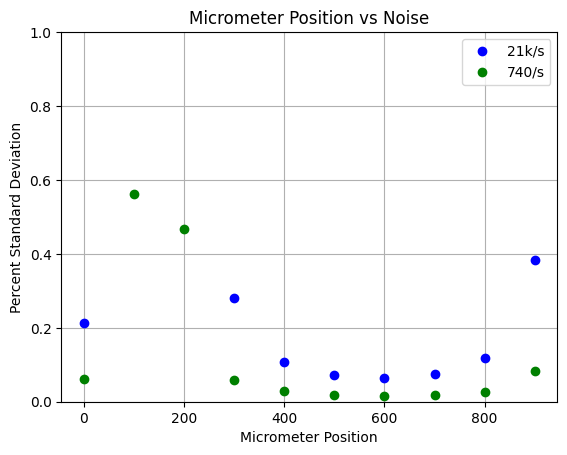

In [36]:
plt.plot(metervals,meterstdpvals,'ob',label='21k/s')
plt.plot(metervals,meterstdpvals6,'og',label='740/s')
plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.ylim(0,1)
plt.grid()
print(f'Minimum for 21k/s: {round(meterstdpvals.min(),3)}%')
print(f'Minimum for 740/s: {round(meterstdpvals6.min(),3)}%')
print(f'21k/s Stable to 1 part per {round(1/(meterstdpvals.min()/100),1)}')
print(f'740/s Stable to 1 part per {round(1/(meterstdpvals6.min()/100),1)}')

The error is significantly less for 740/s than 21k/s most measurements before were using 21k/s

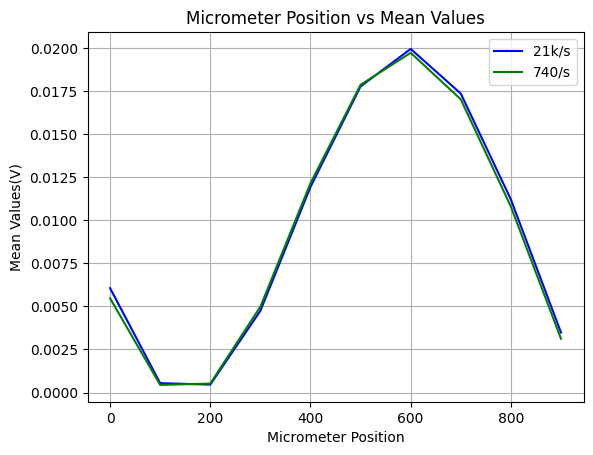

In [37]:
plt.plot(metervals,metermeanvals,'-b',label='21k/s')
plt.plot(metervals,metermeanvals6,'-g',label='740/s')
plt.xlabel('Micrometer Position')
plt.ylabel('Mean Values(V)')
plt.title('Micrometer Position vs Mean Values')
plt.legend()
plt.grid()

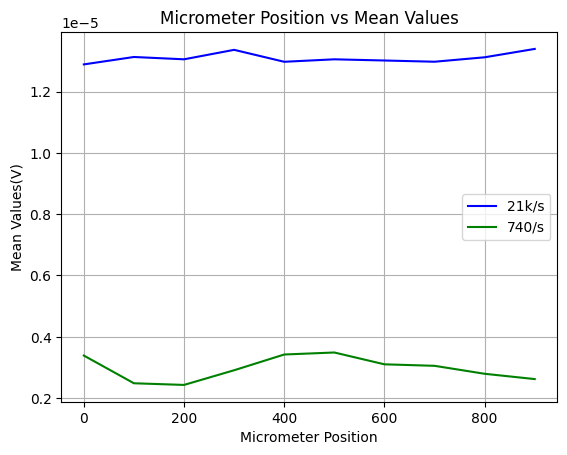

In [38]:
plt.plot(metervals,meterstdvals,'-b',label='21k/s')
plt.plot(metervals,meterstdvals6,'-g',label='740/s')
plt.xlabel('Micrometer Position')
plt.ylabel('Mean Values(V)')
plt.title('Micrometer Position vs Mean Values')
plt.legend()
plt.grid()

In [39]:
#v7 short cable, phase stable, 740/s - no spacers - det646
metervalsarray7 = LoopMeterReadv2('v7')

metermeanvals7 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray7])
meterstdvals7 = np.array([np.abs(np.std(val)) for val in metervalsarray7])
meterstdpvals7 = 100*meterstdvals7/metermeanvals7